# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [ ]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline



In [45]:
billboard = pd.read_csv("../assets/billboard.csv") #reading data set in
#print billboard.tail()
print billboard.info()
billboard.describe()
billboard.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        316 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.wek          210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create a data dictionary for the data set.

In [3]:
data_dict = {'year': 'Year the song was released 317',
'artist.inverted':'' ,  
'track':'track name 317',           
'time':'song length 317',            
'genre':'genre name 317',            
'date.entered':'date entered into billboard 317',    
'date.peaked':'date with the highest billboard score 316',    
'x1st.week-x76th':'score since week released 317'}
print data_dict

{'genre': 'genre name 317', 'date.peaked': 'date with the highest billboard score 316', 'x1st.week-x76th': 'score since week released 317', 'year': 'Year the song was released 317', 'track': 'track name 317', 'time': 'song length 317', 'artist.inverted': '', 'date.entered': 'date entered into billboard 317'}


##### Write a brief description of your data, and any interesting observations you've made thus far. 

Analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent quandary in the industry- why do we like what we like?

['year' 'artist.inverted' 'track' 'time' 'genre' 'date.entered'
 'date.peaked' 'x1st.week' 'x2nd.week']

interesting findings: Theres lots of different genres and even the Thong song from the famous rapper sisqo. Looks like the weeks refer to how many weeks the particular song has been on the billboard and what is the ranking.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [91]:
colnames = billboard.columns.values
specialchars = ['$','&','%','#','?','/']
for col in colnames:
    if any([x in col for x in specialchars]):
        newcol = ''.join([x for x in col if x not in specialchars])
        print newcol
        billboard.rename(columns={col:newcol}, inplace=True)
        
        
billboard = billboard.rename(columns = {'artist.inverted':'artist'})    #rename column as artist
billboard.head()
billboard.tail()

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [77]:

weeks = billboard.columns.values.tolist()
print weeks[7:]
billboard.describe()
subset_long = pd.melt(billboard, id_vars = ['track','artist','genre'], value_vars = weeks[7:], var_name='week',
                      value_name='ranking')


#subset_long.describe()
#print subset_long

# subset_new = subset_long[['track','artist','value']]
#         #var_name='variable',#             value_name='value')
# print subset_new.shape
# subset_new.index = subset_long['variable']
# subset_new

['x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week', 'x10th.week', 'x11th.week', 'x12th.week', 'x13th.wek', 'x14th.week', 'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week', 'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week', 'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week', 'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week', 'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week', 'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week', 'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week', 'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week', 'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week', 'x60th.week', 'x61st.week', 'x62nd.week', 'x63rd.week', 'x64th.week', 'x65th.week', 'x66th.week', 'x67th.week', 'x68th.week', 'x69th.week', 'x70th.week', 'x71st.week', 'x72nd.week', '

In [78]:
week1 = subset_long[subset_long['week'] == 'x1st.week']
print week1.columns    #how our billboard stacks for week 1



Index([u'track', u'artist', u'genre', u'week', u'ranking'], dtype='object')


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

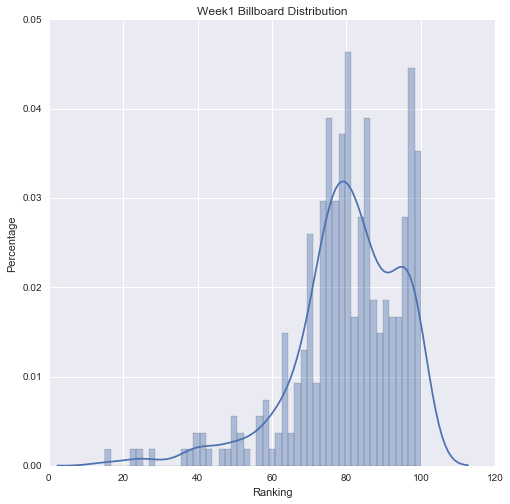

In [96]:
sns.set(rc={"figure.figsize": (8, 8)})
g = sns.distplot(week1.ranking,50)
g.set_title('Week1 Billboard Distribution')
g.set_xlabel('Ranking')
g.set_ylabel('Percentage')

In [90]:
# week 1 sorted ranking now write function to get data on all weeks for these songs

print 'worst:',week1.sort('ranking', ascending = False).head(10), '\n''\n''\n'
print 'best:', week1.sort('ranking', ascending = True).head(10)

worst:                           track          artist    genre       week  ranking
307                      Get Up  Larrieux, Amel      R&B  x1st.week    100.0
47   (Hot S**t) Country Grammar           Nelly      Rap  x1st.week    100.0
300                    No Mercy     Herndon, Ty  Country  x1st.week    100.0
303                       Ta Da         Lil' Mo      Rap  x1st.week    100.0
248           Left, Right, Left           Drama      Rap  x1st.week    100.0
316              Toca's Miracle          Fragma      R&B  x1st.week     99.0
295                   L.A. Song      Hart, Beth  Country  x1st.week     99.0
157           Sexual (Li Da Di)           Amber     Rock  x1st.week     99.0
154        Who Let The Dogs Out        Baha Men      R&B  x1st.week     99.0
62                    Back Here           BBMak     Rock  x1st.week     99.0 



best:                  track                        artist    genre       week  \
1         Maria, Maria                       Santana     Roc

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

In [99]:
for i in weeks:
    week = subset_long[subset_long['week'] == i]
    #print week
    print week.sort('ranking', ascending = True).head(10)

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
Empty DataFrame
Columns: [track, artist, genre, week, ranking]
Index: []
                 track                        artist    genre       week  \
1         Maria, Maria                       Santana     Rock  x1st.week   
80    This Time Around                        Hanson  Country  x1st.week   
45          There U Go                          Pink     Rock  x1st.week   
114            Crybaby                 Carey, Mariah     Rock  x1st.week   
35            Hot Boyz  Elliott, Missy "Misdemeanor"      Rap  x1st.week   
60           She Bangs           

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 